In [15]:
import os

import numpy as np
import pandas as pd
import json
import cv2
import sklearn
from sklearn.model_selection import train_test_split
import cv2

# tf imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras import backend as K

Using TensorFlow backend.


In [19]:
%pip install --upgrade tensorflow-gpu --user

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ------------------------------------- 455.9/455.9 MB 11.7 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 11.9 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 12.1 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 12.9 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 12.2 MB/s eta 0:00:00
     ------------------------------------- 177.0/177.0 kB 10.4 MB/s eta 0:00:00
     ---------------------------------------- 155.3/155.3 kB ? eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 151.7/151.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.14.0 requires tensorboard<1.15.0,>=1.14.0, but you have tensorboard 2.10.1 which is incompatible.
tensorflow 1.14.0 requires tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [20]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11939084944324536476
]


loading images with labels

In [23]:
# f = open("C:\school\minor-ai\lettuce-cnn\data\measurements.json")
f = open("C:/Users/joren/Downloads/wur_dataset/GroundTruth/GroundTruth_All_388_Images.json")
data_json = json.loads(f.read())["Measurements"]

vs = data_json.values()

df = pd.json_normalize(vs)

df.head()


,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6


In [24]:
df.sort_values("Height")

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea
248,Lugano,RGB_9.png,Depth_9.png,2.5,0.10,4.3,9.8,72.2
338,Aphylion,RGB_17.png,Depth_17.png,2.8,0.12,5.0,14.5,67.2
234,Salanova,RGB_10.png,Depth_10.png,1.4,0.09,5.1,13.0,57.6
219,Aphylion,RGB_15.png,Depth_15.png,3.2,0.16,5.1,16.1,87.6
111,Satine,RGB_61.png,Depth_61.png,3.3,0.24,5.2,13.0,89.0
...,...,...,...,...,...,...,...,...
55,Aphylion,RGB_347.png,Depth_347.png,444.7,17.24,24.0,34.5,4995.6
247,Aphylion,RGB_362.png,Depth_362.png,336.0,13.53,24.0,39.0,4429.8
54,Aphylion,RGB_346.png,Depth_346.png,364.8,14.69,24.5,33.0,4516.2
321,Aphylion,RGB_343.png,Depth_343.png,406.0,15.97,25.0,30.0,5379.9


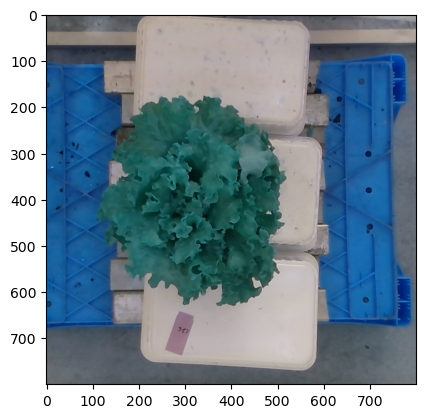

In [27]:
# testing images shaping
# img = cv2.imread('C:\school\minor-ai\lettuce-cnn\data\RGBImages\RGB_270.png')
img = cv2.imread('C:/Users/joren/Downloads/wur_dataset/data/RGBImages/RGB_270.png')
w, h, c = img.shape

img = img[ (w // 2 - 400 ) : (w // 2 + 400) , (h // 2 - 400 + 100)  : (h // 2 + 400 + 100) ]
plt.imshow(img)

In [29]:

# path = "./data/DepthImages/"
path = 'C:/Users/joren/Downloads/wur_dataset/data/DepthImages'
all_images = []
y = []
for image_path in os.listdir(path):
    y.append(df.loc[df['Depth_Information'] == image_path].Height.item())
    img = cv2.imread(path + image_path, -1)
    img = img[ (w // 2 - 400 ) : (w // 2 + 400) , (h // 2 - 400 + 100)  : (h // 2 + 400 + 100) ]
    all_images.append(img)
print(y)
X = np.array(all_images)


TypeError: 'NoneType' object is not subscriptable

In [275]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [276]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [277]:


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(800, 800, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss="mean_squared_error", optimizer="adam", metrics=[r2_keras])
model.summary()
# mean squared error
# mean absolute error percentage
# r2 score

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 798, 798, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 399, 399, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 397, 397, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 198, 198, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 196, 196, 64)      36928     
                                                                 
 dense_6 (Dense)             (None, 196, 196, 1)      

In [2]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=30,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

NameError: name 'np' is not defined

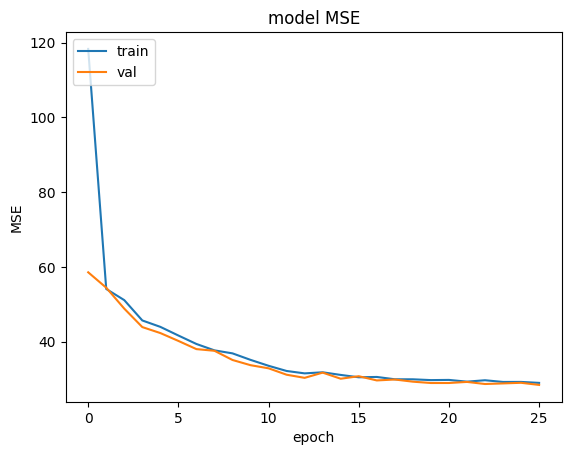

In [286]:
plt.plot(history.history['loss'][4 : ])
plt.plot(history.history['val_loss'][4: ])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.predict([X_train[0]])

ResNet Implementation for regression: depth images height

https://towardsdatascience.com/building-a-resnet-in-keras-e8f1322a49ba

!!LET OP NIET RUNNEN ZONDER GPU!!

In [43]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, \
    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

In [44]:
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

In [45]:
def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides=(1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out

In [46]:
def create_res_net(input_shape, regression):
    inputs = Input(shape=input_shape)
    num_filters = 64

    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)

    num_blocks_list = [2, 5, 5, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j == 0 and i != 0), filters=num_filters)
        num_filters *= 2

    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(10, activation='softmax')(t)

    if regression:
        outputs = Dense(1, activation='linear')(t)

    model = Model(inputs, outputs)

    if regression:
        model.compile(
            optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_percentage_error']
        )
    else:
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

    return model

In [47]:
rn = create_res_net((800,800,1),True)

In [48]:
rn.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 800, 800, 1) 0                                            
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 800, 800, 1)  4           input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 800, 800, 64) 640         batch_normalization_7[0][0]      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 800, 800, 64) 0           conv2d_7[0][0]                   
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import datetime
import os

timestr = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
name = 'res_net_depth'+timestr

checkpoint_path = "checkpoints/"+name+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1
)
tensorboard_callback = TensorBoard(
    log_dir=f'tensorboard_logs/{name}',
    histogram_freq=1
)

# model.fit(
#     x=x_train,
#     y=y_train,
#     epochs=20,
#     verbose=1,
#     validation_data=(x_test, y_test),
#     batch_size=32,
#     callbacks=[cp_callback, tensorboard_callback]
# )